In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [151]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


import src.visualization.visualize as VizManager
import src.features.build_features as FeaturesManager
from sklearn.metrics import classification_report


RANDOM_SEED = 42

In [152]:
seasons_year = [2015, 2016, 2017, 2018]
season_type = "Regular"
features_data = FeaturesManager.build_features(seasons_year, season_type)

# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
features_data.sample(10)

,Game ID,Event Index,Period,Team,Type,Shot Type,Shooter,Shooter ID,Shooter Side,Shooter Ice Position,...,Game seconds,Last event angle,Rebound,Change in Shot Angle,Speed From Previous Event,Shooter Goal Ratio Last Season,Goalie Goal Ratio Last Season,Num players With,Num players Against,Elapsed time since Power Play
259381,2018020508,319,3,Boston Bruins (BOS),Shot,Wrist Shot,Steven Kampfer,8474000,R,D,...,3413,0.000000,0.0,0.0,2.685516,0.000000,0.065041,5.0,5.0,0.0
293352,2018021069,242,3,Chicago Blackhawks (CHI),Shot,Wrist Shot,Brendan Perlini,8477943,L,L,...,2632,12.490406,0.0,0.0,13.160346,0.131783,0.142857,5.0,5.0,0.0
63240,2015021053,250,3,Minnesota Wild (MIN),Goal,Snap Shot,Mikko Koivu,8469459,L,C,...,3355,7.926927,0.0,0.0,2.519223,0.078212,0.085288,5.0,5.0,0.0
5874,2015020099,211,2,San Jose Sharks (SJS),Shot,Wrist Shot,Joe Pavelski,8470794,R,C,...,1873,47.726311,0.0,0.0,4.878777,0.141762,0.096410,5.0,5.0,0.0
214963,2017021059,44,1,Chicago Blackhawks (CHI),Shot,Wrist Shot,Artem Anisimov,8473573,L,C,...,411,30.203238,0.0,0.0,4.785311,0.209524,0.096296,5.0,4.0,43.0
181656,2017020530,265,3,New York Rangers (NYR),Shot,Tip-In,Mats Zuccarello,8475692,L,R,...,3303,-33.407825,0.0,0.0,17.762883,0.079365,0.091522,5.0,5.0,0.0
20779,2015020350,42,1,Winnipeg Jets (WPG),Shot,Wrist Shot,Drew Stafford,8471226,R,R,...,560,7.926927,0.0,0.0,3.034374,0.122449,0.078727,5.0,5.0,0.0
270326,2018020693,181,2,Detroit Red Wings (DET),Shot,Wrist Shot,Anthony Mantha,8477511,L,R,...,2265,-8.259438,0.0,0.0,13.823966,0.126316,0.081967,5.0,5.0,0.0
51425,2015020858,89,1,Washington Capitals (WSH),Shot,Wrap-around,Justin Williams,8468508,R,R,...,953,0.000000,0.0,0.0,6.497753,0.103448,0.091575,5.0,5.0,0.0
155847,2017020113,178,2,Toronto Maple Leafs (TOR),Shot,Wrist Shot,Patrick Marleau,8466139,L,C,...,1744,47.726311,0.0,0.0,3.644715,0.142105,0.073777,5.0,5.0,0.0


In [55]:
distance_data = features_data[['Shot distance', 'Is Goal']].dropna()
X = distance_data[['Shot distance']]
y = distance_data['Is Goal']

In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
print(X_train.shape)
print(y_train.shape)

(244688, 1)
(244688,)


In [93]:
clf = LogisticRegression(random_state=RANDOM_SEED).fit(X_train, y_train)
print(classification_report(y_valid, clf.predict(X_valid)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



In [66]:
accuracy = clf.score(X_valid, y_valid)
print(f'Accuracy on validation set = {np.around(100.*accuracy, 2)}%')

from sklearn.metrics import f1_score
f1Score = f1_score(y_valid, clf.predict(X_valid), average='macro')
print(f'F1-Score on validation set = {np.around(100.*f1Score, 2)}%')

from sklearn.metrics import roc_auc_score
rocauc = roc_auc_score(y_valid,  clf.predict_proba(X_valid)[:,1])
print(f'ROC-AUC on validation set = {np.around(100.*rocauc, 2)}%')

Accuracy on validation set = 90.62%
F1-Score on validation set = 47.54%
ROC-AUC on validation set = 67.82%


0.9061989145360623
Dumb Accuracy on validation set = 90.62%


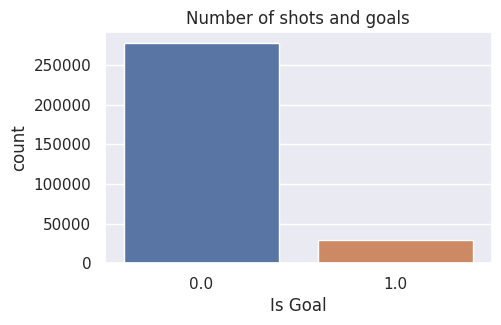

In [33]:
# Accuracy is not the right metric to use, as the classes are unbalanced
num_goals = (y_valid==1).sum()
num_no_goals = (y_valid==0).sum()
print(num_no_goals / (num_no_goals+num_goals))

# features_data['Is Goal'].value_counts().plot(kind = 'bar')
# plt.bar(x=features_data['Is Goal'], height);
sns.set(rc={"figure.figsize":(5, 3)})
sns.countplot(x = features_data['Is Goal']).set(title='Number of shots and goals')
plt.savefig('../../blogpost/imbalanced_fig.png')

# A dumb model that predicts 0 (no goals) all the time reach the same level of performance
def dumb_model(X, y):
    pred = np.zeros_like(X)
    return (y == pred.ravel()).mean()


dumb_accuracy = dumb_model(X_valid, y_valid)
print(f'Dumb Accuracy on validation set = {np.around(100.*dumb_accuracy, 2)}%')

In [67]:
distance_data = features_data[['Shot distance', 'Shot angle', 'Is Goal']]
X = distance_data[['Shot distance', 'Shot angle']]
y = distance_data['Is Goal']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)

In [68]:
# Logistic Regression - Distance only
X_distance_train, X_distance_valid = X_train[['Shot distance']], X_valid[['Shot distance']]
clf_distance = LogisticRegression(random_state=RANDOM_SEED).fit(X_distance_train, y_train)
print(classification_report(y_valid, clf_distance.predict(X_distance_valid)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



In [69]:
# Logistic Regression - Angle only
X_angle_train, X_angle_valid = X_train[['Shot angle']], X_valid[['Shot angle']]
clf_angle = LogisticRegression(random_state=RANDOM_SEED).fit(X_angle_train, y_train)
print(classification_report(y_valid, clf_angle.predict(X_angle_valid)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



In [70]:
# Logistic Regression - Distance and Angle
X_distance_angle_train, X_distance_angle_valid = X_train, X_valid
clf_distance_angle = LogisticRegression(random_state=RANDOM_SEED).fit(X_distance_angle_train, y_train)
print(classification_report(y_valid, clf_distance_angle.predict(X_distance_angle_valid)))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     55434
         1.0       0.00      0.00      0.00      5738

    accuracy                           0.91     61172
   macro avg       0.45      0.50      0.48     61172
weighted avg       0.82      0.91      0.86     61172



<Figure size 800x800 with 0 Axes>

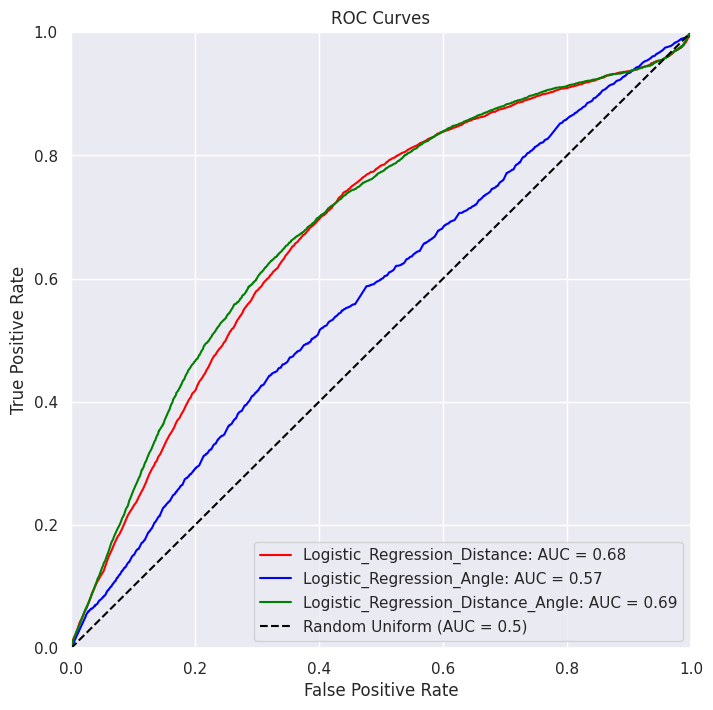

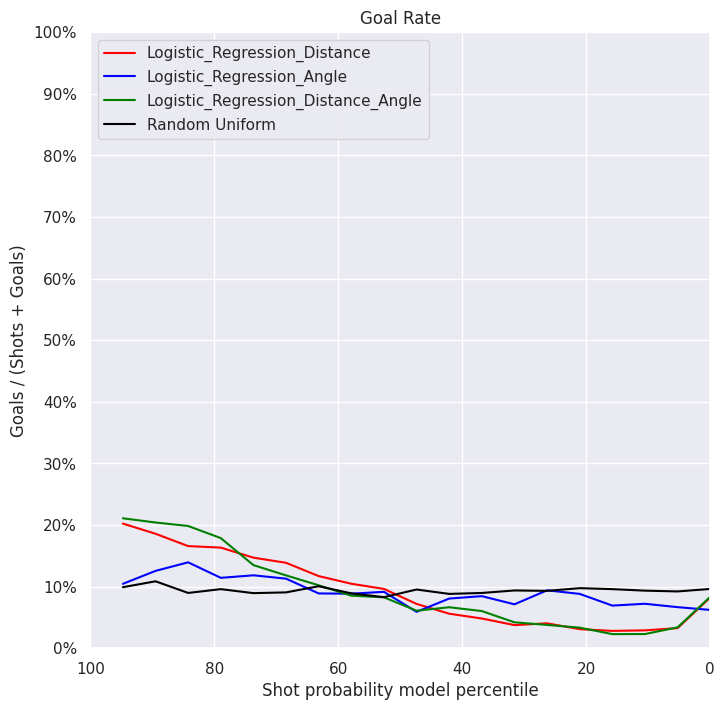

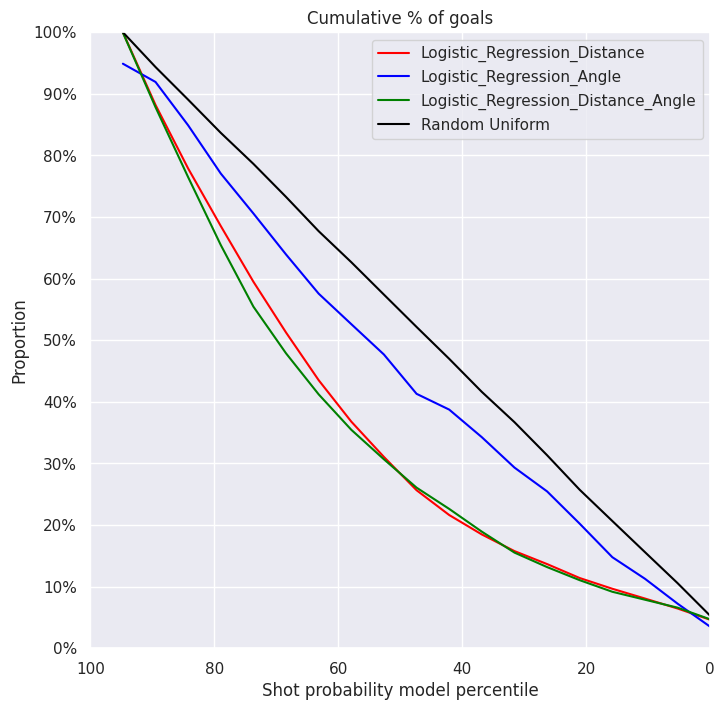

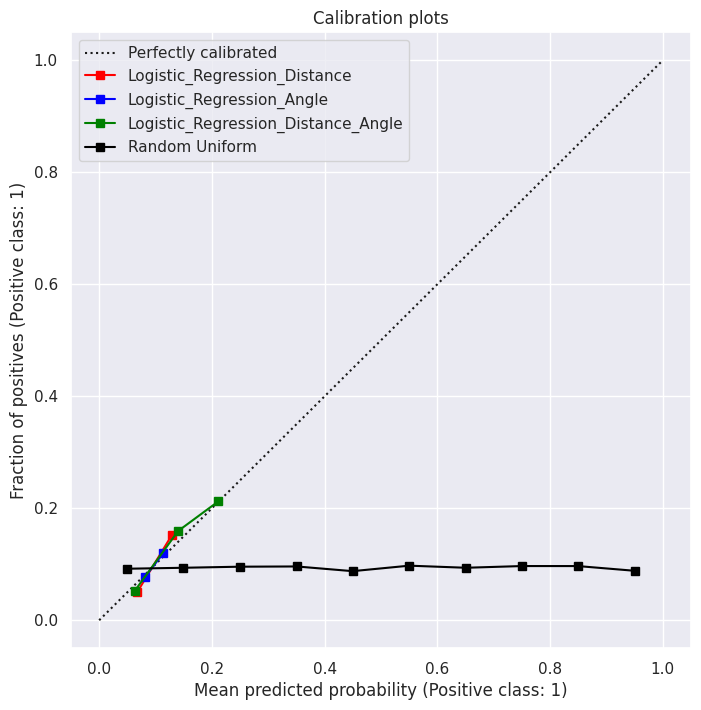

In [98]:
classifiers = [(clf_distance, 'Logistic_Regression_Distance', X_distance_valid, y_valid),
               (clf_angle, 'Logistic_Regression_Angle', X_angle_valid, y_valid),
               (clf_distance_angle, 'Logistic_Regression_Distance_Angle', X_distance_angle_valid, y_valid) ]


VizManager.plot_all_figures(classifiers, add_random=True)